In [1]:
import pandas as pd

In [3]:
abc = pd.read_csv('data/final_data.csv',encoding='cp949')
abc

,행정구역,버스정류소 수,총 인구,주차장 수,자전거 수,보관대 수,대학생 수,면적,인구밀도
0,남구,160,143175,2,17,4,9523,17,8422
1,달서구,561,544926,17,84,24,39597,62,8789
2,달성군,693,262451,0,30,5,13562,426,616
3,동구,583,341436,16,91,18,18307,182,1876
4,북구,588,437008,30,18,3,32156,93,4699
5,서구,190,164528,5,0,0,9699,62,2653
6,수성구,418,417097,10,40,13,27436,76,5488
7,중구,118,74791,6,17,2,4718,7,10684


In [7]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
abc.columns

Index(['행정구역', '버스정류소 수', '총 인구', '주차장 수', '자전거 수', '보관대 수', '대학생 수', '면적',
       '인구밀도'],
      dtype='object')

In [6]:
# 1. 데이터 분리
lamenEval = abc[['버스정류소 수', '총 인구', '주차장 수', '자전거 수', '보관대 수', '대학생 수', '면적','인구밀도']]
lamenName = abc['행정구역']

In [8]:
# 2. 스케일러로 값 변환
# scaling using StandardScaler

scaler = StandardScaler()
scaler.fit(lamenEval.values)
lamen_scaled = scaler.transform(lamenEval.values)

lamen_scaled.shape
# (8,8)

(8, 8)

In [9]:
# 3. PCA 모델링
# - PCA.fit() : 주성분 찾음
# - PCA.transform() : 새로운 주성분으로 데이터 변환

# PCA modelling 
from sklearn.decomposition import PCA

pca_lamen = PCA()
pca_lamen.fit(lamen_scaled)

# data transform
X_pca_lamen = pca_lamen.transform(lamen_scaled)

# look into data shape
print("original data : {}".format(str(lamen_scaled.shape)))
print("transform data : {}".format(str(X_pca_lamen.shape)))

# original data : (8, 8)  transform data : (8, 8)

original data : (8, 8)
transform data : (8, 8)


In [11]:
# PCA 1,2,3 에 대한 변환 스코어
pc1=0
pc2=0
pc3=0

for j in range(len(pca_lamen.components_)):
    pc1 += pca_lamen.components_[0][j] * lamen_scaled[:,j] # 계수 3개에 있어서 스케일된 모든 열을 다 곱하고 더한 것 = pc1
    pc2 += pca_lamen.components_[1][j] * lamen_scaled[:,j]
    pc3 += pca_lamen.components_[2][j] * lamen_scaled[:,j]
    
pc1 = pc1.reshape(8,1)
pc2 = pc2.reshape(8,1)
pc3 = pc3.reshape(8,1)

np.round(np.hstack((pc1,pc2,pc3)),3) == np.round(X_pca_lamen,3)

C:\Users\dkq50\AppData\Local\Temp\ipykernel_24488\725437716.py:15: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  np.round(np.hstack((pc1,pc2,pc3)),3) == np.round(X_pca_lamen,3)


False

c:\Users\dkq50\anaconda3\envs\conda38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


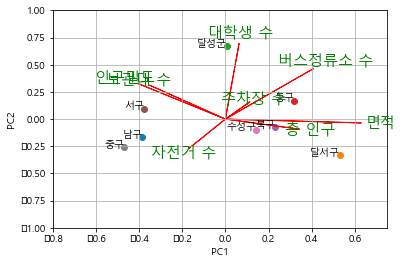

In [12]:
def biplot2(score, coeff, label, pcax, pcay, labels = None):
    pca1=pcax-1
    pca2=pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n=score.shape[1]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    for i in range(len(xs)):
        plt.scatter(xs[i]*scalex, ys[i]*scaley)
        plt.annotate(label.iloc[i], xy=(xs[i]*scalex, ys[i]*scaley), ha='right')
        
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2], color='r', alpha=1)
        if labels is None:
            plt.text(coeff[i,pca1]*1.15, coeff[i,pca2]*1.15, "Var"+str(i+1), color='g', ha = 'center', va='center')
        else:
            plt.text(coeff[i,pca1]*1.15, coeff[i,pca2]*1.15, labels[i], color='g', ha='center', va='center', size=15)
    plt.xlim(-0.8, 0.75)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()
       
##한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path="C:\\Windows\\Fonts\\malgun.ttf"
font_name=fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family']=font_name

%matplotlib inline
biplot2(X_pca_lamen, pca_lamen.components_, lamenName, 1,2,labels=lamenEval.columns)